# pyBumpHunter2D Example

Simple notebook for testing the BumpHunter2D class.

We will use 2D histograms ranging between 0 and 25 (both axis) with $20 \times 20$ even bins.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyBumpHunter as BH
from datetime import datetime  ## Used to compute the execution time

## Generate the data

The data (generated with numpy) consists of three histograms: a steeply falling 'background' distribution, a 'signal' 2D gaussian shape centered on a value of [6.0,7.0], and a 'data' distribution sampled from background and signal distributions, with a signal fraction of 0.5%.

In [2]:
# Generate the background
np.random.seed(42)
bkg = np.random.exponential(scale=[4, 4], size=(1_000_000, 2)) # Need more stat to have a smoother reference

# Generate the data
Nsig = 700
data = np.empty(shape=(100_000 + Nsig, 2))
data[:100_000] = np.random.exponential(scale=[4, 4], size=(100_000, 2))
data[100_000:] = np.random.multivariate_normal(
    mean=[6.0, 7.0], cov=[[3, 0.5], [0.5, 3]], size=(Nsig)
)

# Expected position of the bump in the data
Lth = [6.0, 7.0]

# Range of the histograms (used in the scans)
rang = [[0, 25], [0, 25]]

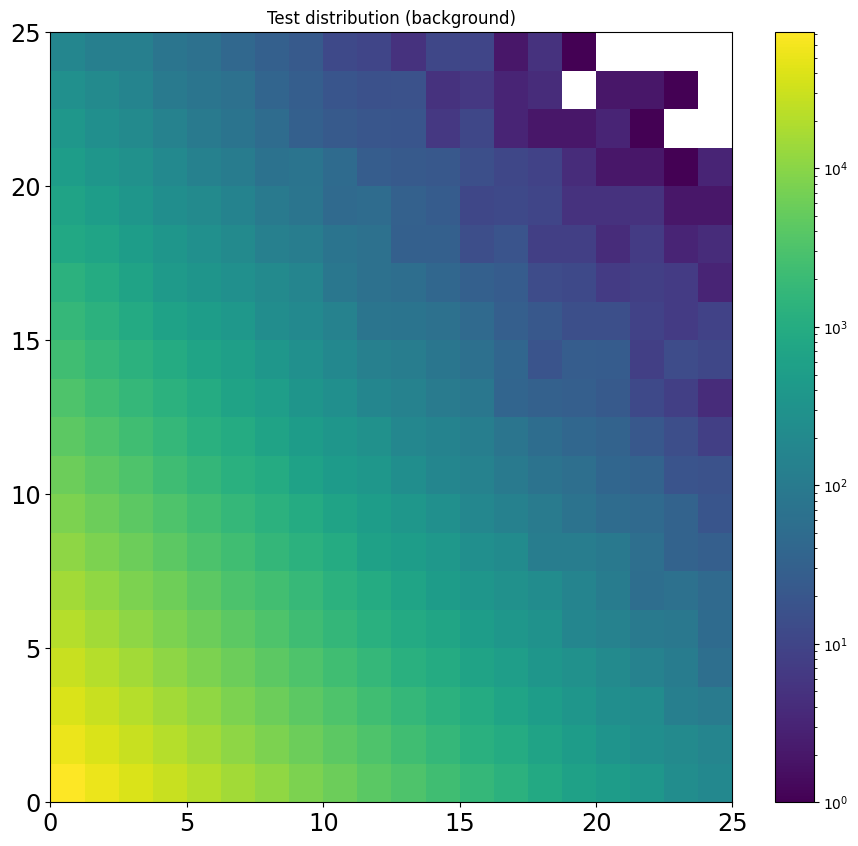

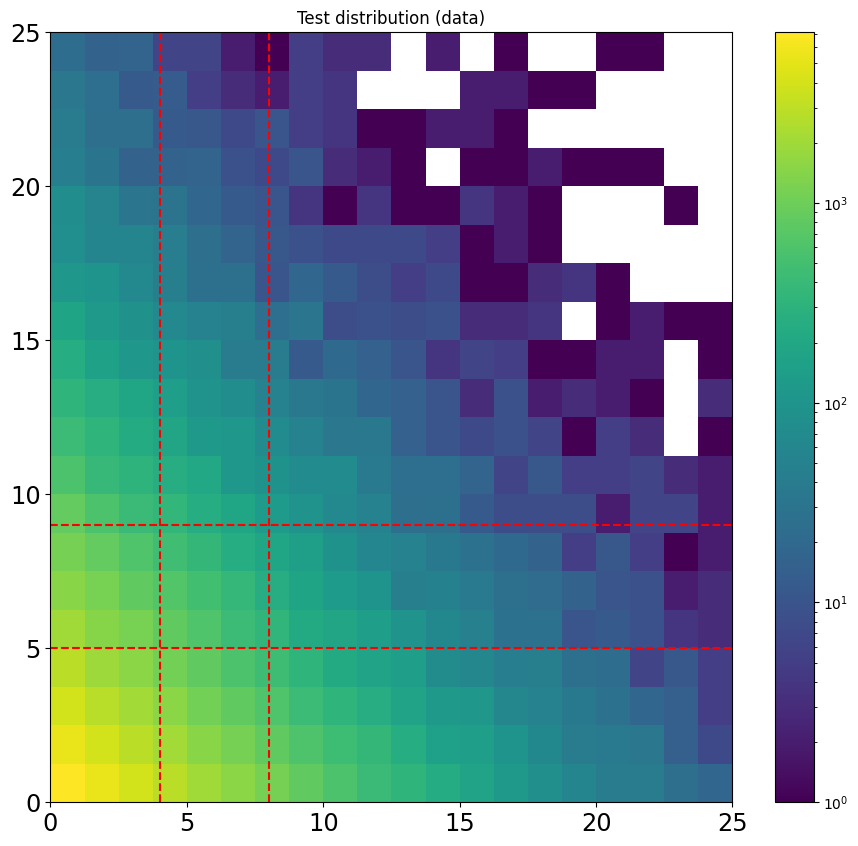

In [3]:
# Plot the 2 distributions (data and background) as 2D histograms
F = plt.figure(figsize=(11, 10))
plt.title("Test distribution (background)")
_, binx, biny, _ = plt.hist2d(
    bkg[:, 0], bkg[:, 1], bins=[20, 20], range=rang, norm=matplotlib.colors.LogNorm()
)
plt.xticks(fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.colorbar()
plt.show()

# The red dashed lines show the true posision of the signal
F = plt.figure(figsize=(11, 10))
plt.title("Test distribution (data)")
plt.hist2d(
    data[:, 0], data[:, 1], bins=[20, 20], range=rang, norm=matplotlib.colors.LogNorm()
)
plt.hlines([5.0, 9.0], binx[0], binx[-1], linestyles="dashed", color="r")
plt.vlines([4.0, 8.0], biny[0], biny[-1], linestyles="dashed", color="r")
plt.xticks(fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.colorbar()
plt.show()

## Create a BumpHunter2D class instance.

The BumpHunter2D class provides all the methods required extend the bump hunt to 2D distributions.

All the parameters and results are also stored in this object.

In [4]:
# Create a BumpHunter2D class instance
hunter = BH.BumpHunter2D(
    rang=rang,
    width_min=[2, 2],
    width_max=[3, 3],
    width_step=[1, 1],
    scan_step=[1, 1],
    bins=[20, 20],
    npe=8000,
    nworker=1,
    seed=666,
    use_sideband=True # Activate side-band normalization
)

## Call the bump_scan Method

The function will scan the data distribution using variable-width window sizes (between width_min and width_max) and calculate the p-value of data with respect to the background for each window. The minimum p-value obtained from all windows is the local p-value.

To cope with the look-elsewhere effect a global p-value is calculated using a two-step procedure:
- the distribution of possible p-values is determined from background-only pseudo-experiments (npe parameter)
- the p-value found in data is compared to the background-only p-value distribution to calculate the global p-value

In [5]:
print("####bump_scan call####")
begin = datetime.now()
hunter.bump_scan(data, bkg)
end = datetime.now()
print(f"time={end - begin}")

####bump_scan call####
Generating histograms
4 values of width will be tested
SCAN
Global p-value : 0.0006  (5 / 8000)
Significance = 3.22722

time=0:00:28.230006


## Print results of BH scan

Print information on more significant window ("bump"): location, width, excess over background events, global p-value and global significance.

In [6]:
#hunter.print_bump_info()
#hunter.print_bump_true(data, bkg)
print(hunter.bump_info(data))
print(f"   mean (true) = {Lth}")

ValueError: operands could not be broadcast together with shapes (4,) (0,) 

## Show most significant window

Window with the lowest p-value obtained from the data scans.

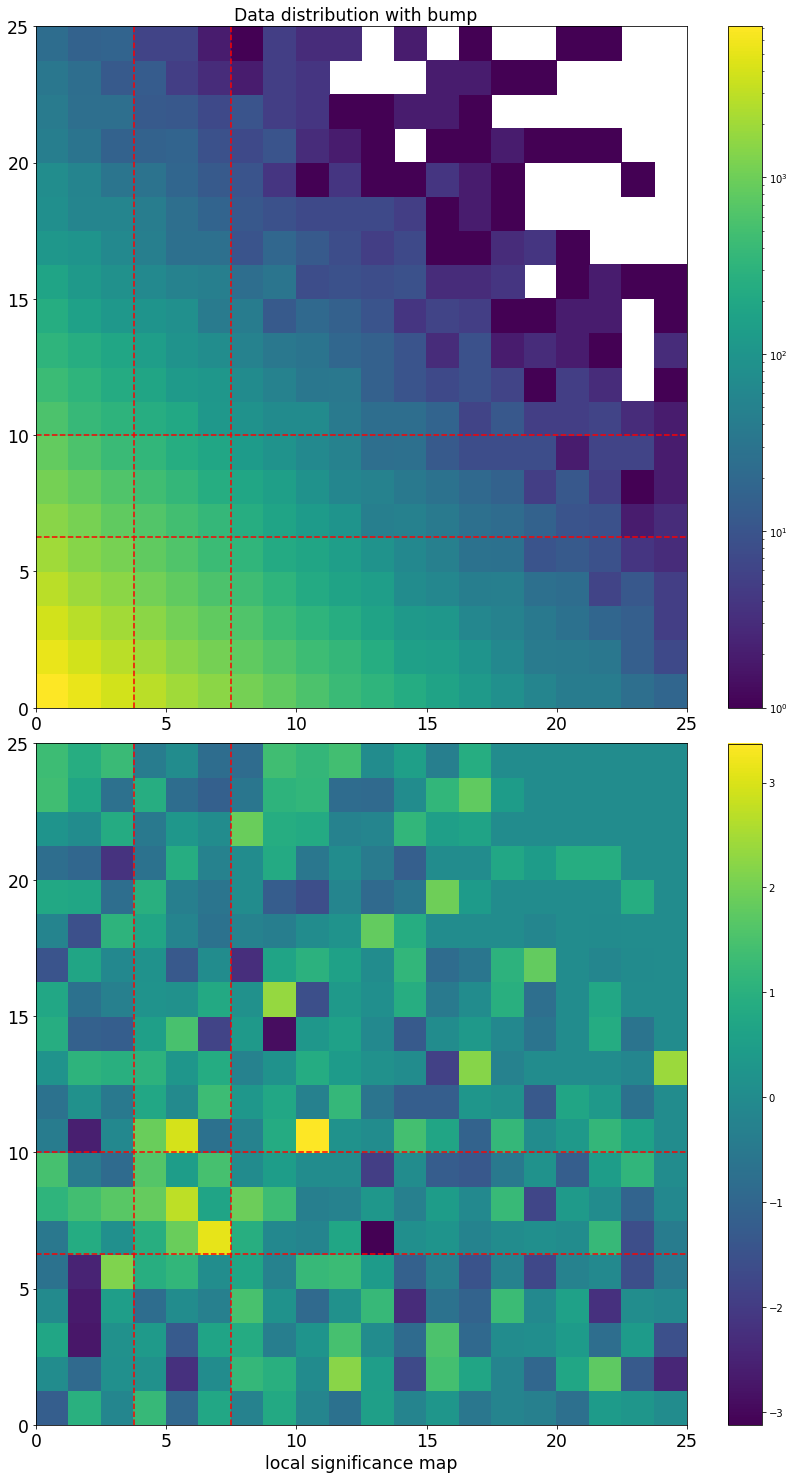

In [ ]:
hunter.plot_bump(data, bkg)

# Global p-value

This figure shows the test statistics (-log(p-value)) obtained from background-only toys and the p-value obtained from data. The global p-value is equal to the fraction of background-only experiments whch have a higher test statistics than for the data (i.e this is the p-value of p-values).

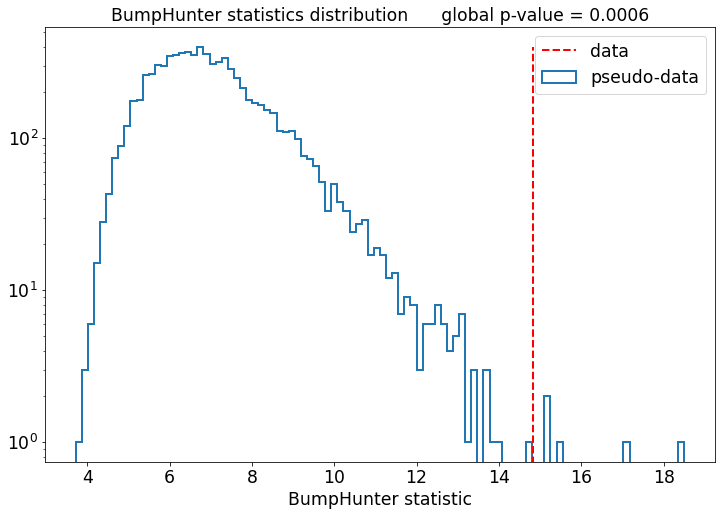

In [ ]:
hunter.plot_stat(show_Pval=True)